In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Matplotlib is building the font cache; this may take a moment.


In [2]:
# ============================
# 1️⃣ Load and Explore Dataset
# ============================
print("🔹 Loading Dataset...")
df = pd.read_csv("../data/car_prices.csv")

# Display basic dataset info
print("\nDataset Info:")
print(df.info())

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())


🔹 Loading Dataset...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB
None

First 5 rows:
     Brand                     Model  Year  Selling_Price  KM_Driven    Fuel  \
0   Maruti             Maruti 800 AC  2007          60000      70000  Petrol   
1   Maruti  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2  Hyundai      Hyundai Verna 1.6 SX  2012         600000     100000  Die


Missing Values:
Brand            0
Model            0
Year             0
Selling_Price    0
KM_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Summary Statistics:
              Year  Selling_Price      KM_Driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000


C:\Users\jhonk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


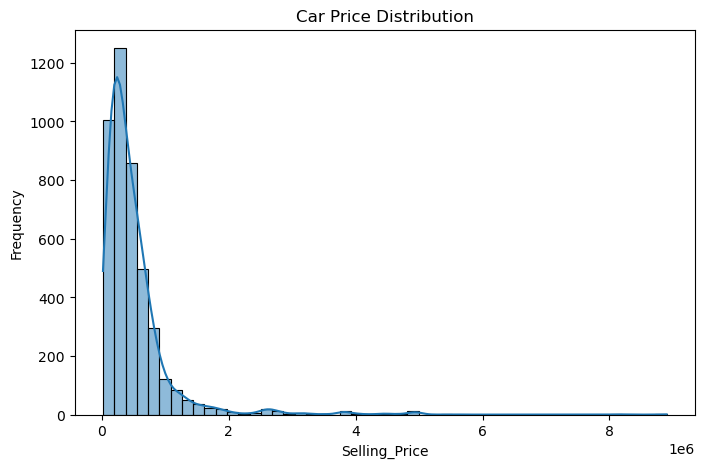

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Visualize price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Selling_Price'], bins=50, kde=True)
plt.title("Car Price Distribution")
plt.xlabel("Selling_Price")
plt.ylabel("Frequency")
plt.show()


In [4]:
# Print all column names
print(df.columns)


Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [7]:
# ============================
# 2️⃣ Data Preprocessing
# ============================
print("🔹 Preprocessing Data...")

# Drop rows with missing values
df = df.dropna()

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature scaling
scaler = StandardScaler()
scaled_columns = ['KM_Driven', 'Year']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])

# Save preprocessed dataset
df.to_csv("../data/car_prices_preprocessed.csv", index=False)

print("✅ Data Preprocessing Completed!\n")

🔹 Preprocessing Data...
✅ Data Preprocessing Completed!



🔹 Training Model...
📊 Model Evaluation:
Mean Squared Error: 252134906814.07
R-squared Score: 0.17


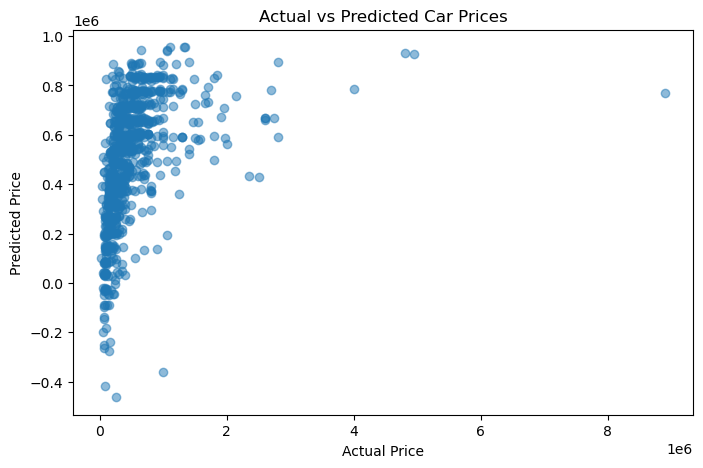

✅ Model Training Completed!



In [8]:
# ============================
# 3️⃣ Model Training & Evaluation
# ============================
print("🔹 Training Model...")

# Define features (X) and target variable (y)
X = df[['Year', 'KM_Driven', 'Brand']]  # Adjust feature columns as needed
y = df['Selling_Price']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Save the trained model
joblib.dump(model, "../src/model.pkl")

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

print("✅ Model Training Completed!\n")